In [54]:
!pip install scikit-learn joblib streamlit


[notice] A new release of pip is available: 23.2.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [55]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [56]:
loan=pd.read_csv('loan_data_set.csv')

In [85]:
loan.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,0,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,N
2,1,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,Y
3,2,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,Y


In [58]:
loan.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [59]:
loan.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [60]:
loan['Credit_History'].value_counts()

Credit_History
1.0    475
0.0     89
Name: count, dtype: int64

In [61]:
loan['Credit_History']=loan['Credit_History'].fillna(0.0)

In [62]:
loan['Self_Employed'].value_counts()

Self_Employed
No     500
Yes     82
Name: count, dtype: int64

In [63]:
loan['Self_Employed']=loan['Self_Employed'].fillna('No')

In [64]:
loan.dropna(inplace=True)

In [65]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
Index: 553 entries, 1 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            553 non-null    object 
 1   Gender             553 non-null    object 
 2   Married            553 non-null    object 
 3   Dependents         553 non-null    object 
 4   Education          553 non-null    object 
 5   Self_Employed      553 non-null    object 
 6   ApplicantIncome    553 non-null    int64  
 7   CoapplicantIncome  553 non-null    float64
 8   LoanAmount         553 non-null    float64
 9   Loan_Amount_Term   553 non-null    float64
 10  Credit_History     553 non-null    float64
 11  Property_Area      553 non-null    object 
 12  Loan_Status        553 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 60.5+ KB


In [66]:
from sklearn.preprocessing import LabelEncoder
categorical=['Loan_ID','Gender','Married','Education','Self_Employed','Property_Area']
for cat in categorical:
  print(f"Column: {cat}")
  print(loan[cat].value_counts)
  print('__'*20)


Column: Loan_ID
<bound method IndexOpsMixin.value_counts of 1      LP001003
2      LP001005
3      LP001006
4      LP001008
5      LP001011
         ...   
609    LP002978
610    LP002979
611    LP002983
612    LP002984
613    LP002990
Name: Loan_ID, Length: 553, dtype: object>
________________________________________
Column: Gender
<bound method IndexOpsMixin.value_counts of 1        Male
2        Male
3        Male
4        Male
5        Male
        ...  
609    Female
610      Male
611      Male
612      Male
613    Female
Name: Gender, Length: 553, dtype: object>
________________________________________
Column: Married
<bound method IndexOpsMixin.value_counts of 1      Yes
2      Yes
3      Yes
4       No
5      Yes
      ... 
609     No
610    Yes
611    Yes
612    Yes
613     No
Name: Married, Length: 553, dtype: object>
________________________________________
Column: Education
<bound method IndexOpsMixin.value_counts of 1          Graduate
2          Graduate
3      Not Gradua

In [67]:
for cat in categorical:
  le=LabelEncoder()
  loan[cat]=le.fit_transform(loan[cat])

In [68]:
loan['Dependents']=loan['Dependents'].replace('3+',3).astype(int)

In [69]:
loan['Dependents'].value_counts()

Dependents
0    316
1     96
2     96
3     45
Name: count, dtype: int64

In [70]:
X=loan.drop('Loan_Status',axis=1)
Y=loan['Loan_Status']

In [71]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
Y=le.fit_transform(Y)

In [72]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X=sc.fit_transform(X)

In [73]:
X

array([[-1.72892154,  0.48127522,  0.73511222, ...,  0.27996068,
         0.52363494, -1.30735908],
       [-1.72265733,  0.48127522,  0.73511222, ...,  0.27996068,
         0.52363494,  1.25182525],
       [-1.71639312,  0.48127522,  0.73511222, ...,  0.27996068,
         0.52363494,  1.25182525],
       ...,
       [ 1.71639312,  0.48127522,  0.73511222, ...,  0.27996068,
         0.52363494,  1.25182525],
       [ 1.72265733,  0.48127522,  0.73511222, ...,  0.27996068,
         0.52363494,  1.25182525],
       [ 1.72892154, -2.0778132 , -1.36033653, ...,  0.27996068,
        -1.90972742, -0.02776692]], shape=(553, 12))

In [74]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [75]:
from sklearn.svm import SVC
model=SVC(probability=True,kernel='rbf',random_state=42)
model.fit(x_train,y_train)
y_pred=model.predict_proba(x_test)[:,1]

In [76]:
from sklearn.metrics import roc_curve,auc
fpr,tpr,thresholds=roc_curve(y_test,y_pred)
roc_auc=auc(fpr,tpr)

In [77]:
unique_labels, counts = np.unique(y_test, return_counts=True)
print(dict(zip(unique_labels, counts)))

{np.int64(0): np.int64(34), np.int64(1): np.int64(77)}


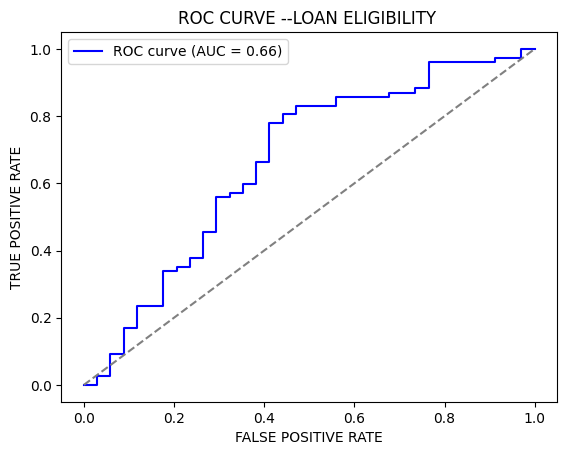

In [78]:
plt.plot(fpr,tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.title("ROC CURVE --LOAN ELIGIBILITY ")
plt.plot([0,1],[0,1],color='gray',linestyle='--')
plt.xlabel('FALSE POSITIVE RATE')
plt.ylabel('TRUE POSITIVE RATE')
plt.legend()
plt.show()


In [79]:
from sklearn.metrics import classification_report
y_pred=model.predict(x_test)
print(classification_report(y_pred,y_test))


              precision    recall  f1-score   support

           0       0.38      0.54      0.45        24
           1       0.86      0.76      0.80        87

    accuracy                           0.71       111
   macro avg       0.62      0.65      0.63       111
weighted avg       0.75      0.71      0.73       111



In [82]:
import joblib

In [89]:
joblib.dump(model,'loan_model.pkl')
joblib.dump(sc,'scaler.pkl')


['scaler.pkl']

In [90]:
label_encoders = {
    'Gender': LabelEncoder().fit(loan['Gender']),
    'Married': LabelEncoder().fit(loan['Married']),
    'Education': LabelEncoder().fit(loan['Education']),
    'Self_Employed': LabelEncoder().fit(loan['Self_Employed']),
    'Property_Area': LabelEncoder().fit(loan['Property_Area']),
    'Loan_Status': LabelEncoder().fit(loan['Loan_Status'])
}
joblib.dump(label_encoders, 'label_encoders.pkl')

# Save feature names (original order)
feature_names = loan.drop('Loan_Status', axis=1).columns.tolist()
joblib.dump(feature_names, 'feature_names.pkl')

print("All model files saved successfully!")

All model files saved successfully!
